In [20]:
import numpy as np 
import pandas as pd 

In [21]:
data=pd.read_csv("/kaggle/input/grocery-product-prices-for-australian-states/Australia_Grocery_2022Sep.csv")
data.drop(["Postal_code","RunDate","Product_Url","tid","state","index"], axis=1,inplace=True)

In [22]:
data.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,$6.50 per 1Kg,approx. 1.1kg,1,0,NaN,NaN,Coles,1491280P,6.5,1Kg,TEMPE
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,$9.00 per 1Kg,approx. 600g,1,0,NaN,NaN,Coles,1718058P,9.0,1Kg,TEMPE


In [23]:
df=data.dropna()
df=df.reset_index(drop=True)
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE


In [24]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=["unit_price_unit","package_size","Price_per_unit","Brand","Sku","city"])
df=ordenc.fit_transform(df)

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df = df.apply(label_encoder.fit_transform)

In [26]:
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,3,17,44,878,103,0,0,0,1,0,168,0,0,207,0,0
1,3,0,4,57,161,1,1,1,1,0,255,0,1,318,0,0


# PCA

In [27]:
from sklearn.decomposition import PCA
n=3
pca = PCA(n_components=n)
principal_components = pca.fit_transform(df)
component_names = [f"Component {i}" for i in range(n)]
pca_data = pd.DataFrame(principal_components, columns=component_names)
pca_data.head(2)

,Component 0,Component 1,Component 2
0,-422.111316,-286.986117,24.699715
1,317.954171,-647.746922,154.880675


In [28]:
pca.explained_variance_ratio_

array([0.46793674, 0.40209352, 0.04604899])

****

****

# KMeans


In [29]:
from sklearn.cluster import KMeans
# Apply k-means clustering to the data
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_data)

# Assign each data point to a cluster
clusters = kmeans.predict(pca_data)
pc=principal_components
# Find the top 10 most similar products for each product
for i in range(len(data[:30])):
    cluster_indices = np.where(clusters == clusters[i])[0]
#     print(cluster_indices)
    distances = np.linalg.norm(pc[cluster_indices] - pc[i], axis=1)
#     print(distances)
    closest_indices = np.argsort(distances)[:10]
#     print(cluster_indices[closest_indices])
#     closest_products = df.loc[cluster_indices[closest_indices]]
    print("Top 10 closest products for product", i, ":", cluster_indices[closest_indices],"\n\n\n\n")

Top 10 closest products for product 0 : [   0   31 2071 3000   53  155  254  335  406  477] 




Top 10 closest products for product 1 : [   1    2   15 1801 4925   59 1788   32 4412  168] 




Top 10 closest products for product 2 : [   2    1   15 1801 4925   59 1788   32 4412  168] 




Top 10 closest products for product 3 : [   3  349  547  863 1146 1316 4165 4822 6137 6139] 




Top 10 closest products for product 4 : [   4   48 3716 5701 5698   60  844 1789 4938 3977] 




Top 10 closest products for product 5 : [   5   16 1091 4930   62  175  495  707  881 1426] 




Top 10 closest products for product 6 : [   6 5041 5518 4081 5720 1357 1240   11    7   38] 




Top 10 closest products for product 7 : [   7   14  174 1852 2208 4919   44  163  603  777] 




Top 10 closest products for product 8 : [   8   56  280  490  875 1152 1216 1319 1609 1681] 




Top 10 closest products for product 9 : [   9   57  183  281  432  491  555  796  876 1153] 




Top 10 closest products for pr

In [30]:
print(np.unique(clusters))

[0 1 2 3 4]


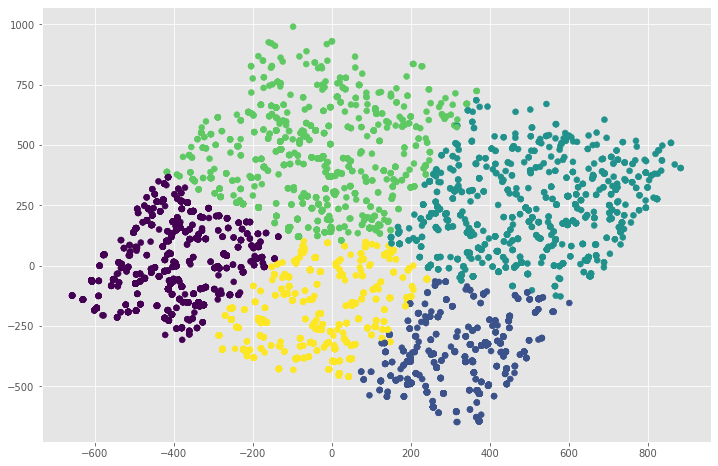

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters)
plt.show()



In [32]:
import plotly.graph_objs as go

# Create a 3D scatter plot, colored by cluster assignment
plt.figure(figsize=(12,12))
fig = go.Figure(data=[go.Scatter3d(x=principal_components[:,0], 
                                   y=principal_components[:,1], 
                                   z=principal_components[:,2], 
                                   mode='markers',
                                   marker=dict(color=clusters))])
fig.show()


<Figure size 864x864 with 0 Axes>

In [33]:
# import plotly.express as px
# import pandas as pd

# df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
# df['clusters'] = clusters
# fig = px.parallel_coordinates(df, color='clusters')
# fig.show()

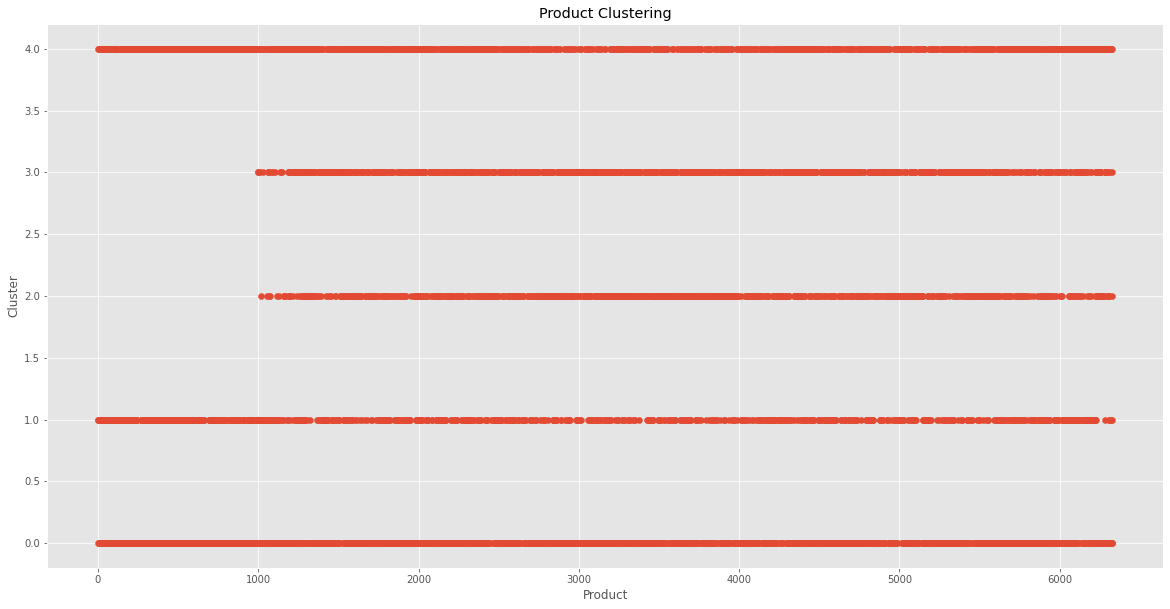

In [34]:
plt.figure(figsize=(20,10))
plt.scatter(range(len(df)), clusters)
plt.xlabel('Product')
plt.ylabel('Cluster')
plt.title('Product Clustering')
plt.show()


In [35]:
# from scipy.cluster import hierarchy
# plt.figure(figsize=(20,10))
# # Compute the linkage matrix
# Z = hierarchy.linkage(pca_data, method='ward')
# # Create a dendrogram
# hierarchy.dendrogram(Z)
# plt.xlabel('Product')
# plt.ylabel('Distance')
# plt.title('Product Distance')
# plt.show()


In [36]:
range(len(df))

range(0, 6330)

In [38]:
import plotly.graph_objs as go
x_product=[i for i in range(6330)]
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x_product, 
                                   y=clusters, 
                                   z=distances,
                                   mode='markers',
                                   marker=dict(size=5, color=clusters, colorscale='Viridis'))])

fig.update_layout(scene=dict(xaxis_title='Product', yaxis_title='Cluster', zaxis_title='Distance'))
fig.update_layout(title='Product Clustering and Distance')

# Show the plot
fig.show()

****

# DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5,n_clusters=5)
clusters = dbscan.fit_predict(pca_data)

# Find the top 10 most similar products for each product
for i in range(len(data[:20])):
    cluster_indices = np.where(clusters == clusters[i])[0]
    distances = np.linalg.norm(pc[cluster_indices] - pc[i], axis=1)
    closest_indices = np.argsort(distances)[:10]
#     closest_products = df.loc[cluster_indices[closest_indices]]
    print("Top 10 closest products for product", i, ":", cluster_indices[closest_indices])


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters)
plt.show()


****

# AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Apply hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(pca_data)

# Find the top 10 most similar products for each product
for i in range(len(df[:20])):
    cluster_idx = agg_clustering.labels_[i]
    similar_products = np.where(agg_clustering.labels_ == cluster_idx)[0]
    top_10_similar_products = similar_products[:10]
    print("Product", i, "is most similar to:", top_10_similar_products)


****

****

# DBSCAN with cosine_similarity

In [ ]:
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity



dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(pca_data)

for i in range(len(data[:20])):
    cluster_indices = np.where(clusters == clusters[i])[0]
    p1 = np.array(pc[cluster_indices]).reshape(-1, pc.shape[1])
    p2 = np.array(pc[i]).reshape(1, -1)
    similarities = cosine_similarity(p1, p2)
    closest_indices = np.argsort(similarities.flatten())[-10:]
    print("Top 10 closest products for product", i, ":", cluster_indices[closest_indices])



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(principal_components[:, 5], principal_components[:, 1], c=clusters)
plt.show()

****